In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['axes.grid']=True
import math

# Lista 7 (4 pkt.) Termin: 7.01.2021r.

## Zadanie 1 (1 pkt.)

Narysuj krzywą eliptyczną określoną równaniem
$$y^2=x^3-x+1$$
nad ciałem $\mathbb{R}$.

<ipython-input-2-e557194ac85c>:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, np.sqrt(x**3 - x + 1))
<ipython-input-2-e557194ac85c>:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, -np.sqrt(x**3 - x + 1))


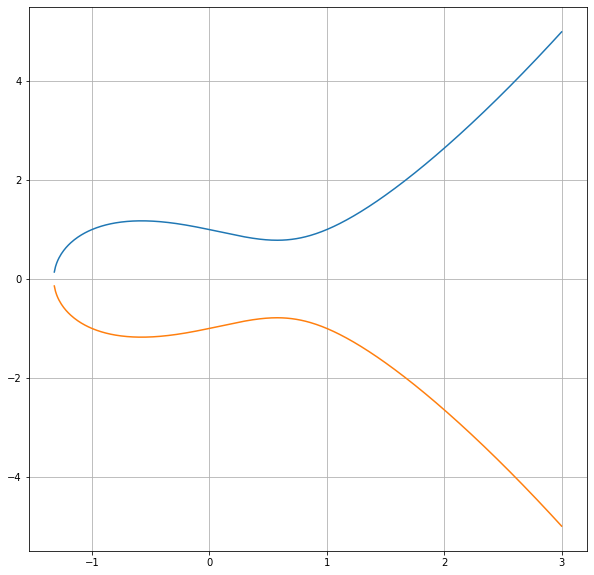

In [2]:
x = np.arange(-3,3.01,0.01)
plt.plot(x, np.sqrt(x**3 - x + 1))
plt.plot(x, -np.sqrt(x**3 - x + 1))
plt.show() 


# plt.yscale('log')
# plt.xplot(x,'m')

## Zadanie 2 (3 pkt.)

Narysuj krzywą z poprzedniego zadania i zaznacz na niej punkty $P$ i $Q$ o współrzędnych:

In [3]:
P=[-1.2625511274071601, 0.5]
Q=[0,1]

następnie narysuj linię przechodzącą przez te punkty. Napisz funkcję $\textit{add_minus(P,Q)}$, która przyjmuje współrzędne punktów $P$ i $Q$ oraz zwraca wspólrzędne punktu $R$ takiego, że $P+Q+R=0$, czyli punktu na przecięciu prostej przechodzącej przez $P$ i $Q$ z krzywą.

Dla krzywej eliptycznej zadanej równaniem:
$$y^2=x^3+ax+b$$
współrzędne punktu $R$ są zadane wzorami:
$$x_R=s^2-x_P-x_Q$$
$$y_R=y_P+s(x_R-x_P)$$
gdzie
$s=\frac{y_P-y_Q}{x_P-x_Q}$ dla $P\neq Q$

oraz

$s=\frac{3x_P^2+a}{2y_P}$ dla $P=Q$

Uwaga: w $s$ może pojawić się dzielenie przez $0$ co oznacza, że współrzędne $x_R$ i $y_R$ będą współrzędnymi punktu w nieskończoności, który  w ramach definicji jest elementem neutralnym grupy.

Narysuj na poprzednim obrazku punkt $R$ i zobacz, że jest na przecięciu się prostej i krzywej.

Napisz funkcję $\textit{inv(P)}$ zwracającą współrzędne punktu będącego przeciwieństwem (elementem odwrotnym w grupie) punktu $P=(x_P,y_P)$, element przeciwny jest zdefiniowany jako:
$$-P=(x_P,-y_P)$$.

Funkcja $\textit{add_minus(P,Q)}$ zwraca $R$ takie, że $P+Q+R=0$, czyli $R=-(P+Q)$, korzystając z $\textit{inv}$, napisz funkcję $\textit{add(P,Q)}$, która zwraca $P+Q$.

Narysuj punkt $P+Q$ i zobacz, że jest odbiciem punktu $R=-(P+Q)$ względem osi $x$.

In [4]:
def add_minus(P,Q):
    R =[]
    if P==Q:
        s =(3*P[0]**2 - 1)/ (2*P[1])
    else: 
        s = (P[1] - Q[1])/(P[0] - Q[0])
        
    R.append(s**2 - P[0] -Q[0])
    R.append(P[1] +s*(R[0] - P[0]))
    return R  

In [5]:
def inv(P):
    inv_P = []
    inv_P.append(P[0])
    inv_P.append(-P[1])
    return inv_P
# print(inv(P))

In [6]:
def add(P,Q):
    
    return inv(add_minus(P,Q))
# print(add(P,Q))

In [7]:
print(add_minus(P,Q)==[1.4193857924019508, 1.5621102233368063])
print(inv(P)==[-1.2625511274071601, -0.5])
print(add(P,Q)==[1.4193857924019508, -1.5621102233368063])

True
True
True


<ipython-input-8-183bc1a51b55>:18: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, np.sqrt(x**3 - x + 1))
<ipython-input-8-183bc1a51b55>:19: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, -np.sqrt(x**3 - x + 1))


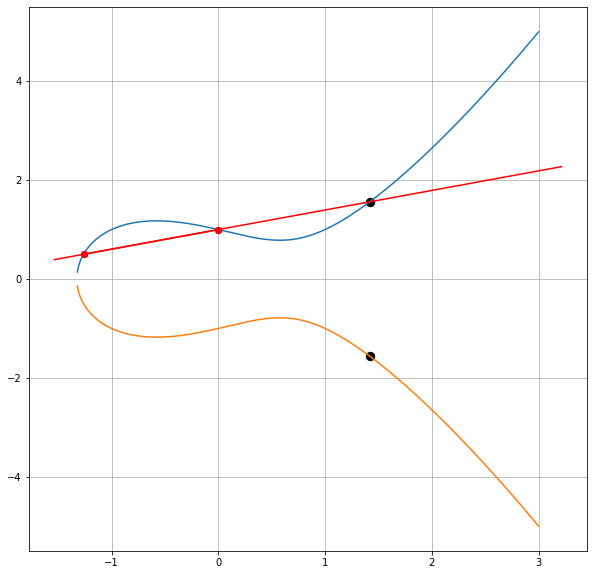

In [8]:

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color='r')
    ax.add_line(l)
    return l


x = np.arange(-3,3.01,0.01)
plt.plot(x, np.sqrt(x**3 - x + 1))
plt.plot(x, -np.sqrt(x**3 - x + 1))

plt.scatter(Q[0], Q[1], color='red', s=40, marker='o')
plt.scatter(P[0], P[1], color='red', s=40, marker='o')
plt.plot([P[0],Q[0]],[P[1],Q[1]],color='r',marker='o')

newline(P,Q)
plt.scatter(add_minus(P,Q)[0], add_minus(P,Q)[1], color='black', s=70, marker='o') 
plt.scatter(add(P,Q)[0], add(P,Q)[1], color='black', s=70, marker='o')
plt.show()